# できたモデルの精度を検証する

In [29]:
# 必要なものをインポート
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import os
from IPython.display import display

In [8]:
# ベースとなるモデルの読み込み
model = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:05<00:00, 25.7MB/s] 


In [9]:
# ベースとなるモデルに追加学習
model.train(data='data.yaml', epochs=3)

New https://pypi.org/project/ultralytics/8.0.117 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.107 🚀 Python-3.9.6 torch-2.0.1 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=data.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fal

In [10]:
# モデルの検証用画像のパス
iden1 = "/Users/matsumotokotarou/My_Data/Local_Programing/workspace/labo/strawberry_data_4_24/datasets/identification/3_6_01501.png"
iden2 = "/Users/matsumotokotarou/My_Data/Local_Programing/workspace/labo/strawberry_data_4_24/datasets/identification/3_6_08881.png"

In [13]:
# モデルに推測させる（1）
result1 = model(iden1, save=True)


image 1/1 /Users/matsumotokotarou/My_Data/Local_Programing/workspace/labo/strawberry_data_4_24/datasets/identification/3_6_01501.png: 640x384 10 strawberrys, 377.5ms
Speed: 1.5ms preprocess, 377.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


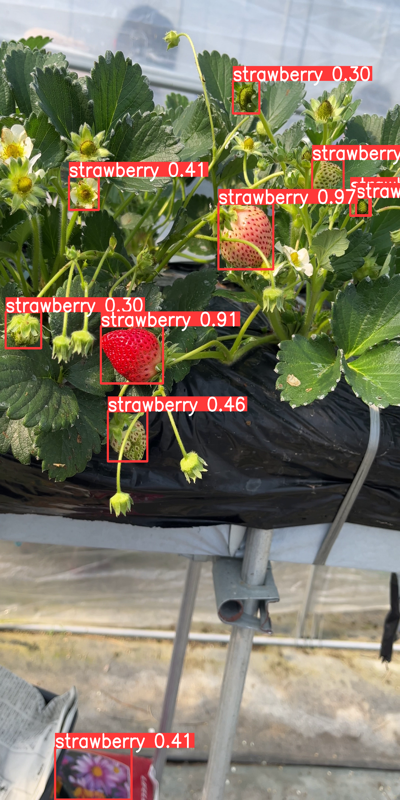

In [34]:
# 推測した画像を見てみる（1）
result1_img = Image.open("/Users/matsumotokotarou/My_Data/Local_Programing/workspace/labo/6_14/runs/detect/predict2/3_6_01501.png")
result1_img = result1_img.resize((400,800))
result1_img

In [16]:
# モデルの精度を検証する
metrics = model.val()

Ultralytics YOLOv8.0.107 🚀 Python-3.9.6 torch-2.0.1 CPU
val: Scanning /Users/matsumotokotarou/My_Data/Local_Programing/workspace/labo/strawberry_data_4_24/datasets/valid.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.40s/it]
                   all         10        103      0.862      0.791      0.904      0.534
Speed: 0.3ms preprocess, 507.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val


In [32]:
# 特定のフォルダ内の画像を一括表示する関数を定義
def batch_display(folder_path):

    # 画像ファイルの拡張子（ここでは".jpg"と".png"を対象としています）
    extensions = (".jpg", ".png")

    # 画像ファイルのパスを格納するリスト
    image_paths = []

    # フォルダ内のファイルを走査して画像ファイルのパスをリストに追加する
    for file_name in os.listdir(folder_path):
        if file_name.endswith(extensions):
            image_path = os.path.join(folder_path, file_name)
            image_paths.append(image_path)

    # 画像を順番に読み込んでリストに格納する
    images = []
    for image_path in image_paths:
        image = Image.open(image_path)
        images.append(image)
        
    # 画像のサイズを取得
    widths, heights = zip(*(i.size for i in images))

    # 結合後の画像のサイズを計算
    max_width = max(widths)
    total_height = sum(heights)

    # 空のキャンバスを作成
    combined_image = Image.new("RGB", (max_width, total_height))

    # 画像をキャンバスに貼り付ける
    y_offset = 0
    for image in images:
        combined_image.paste(image, (0, y_offset))
        y_offset += image.height

    # 画像を表示
    display(combined_image)



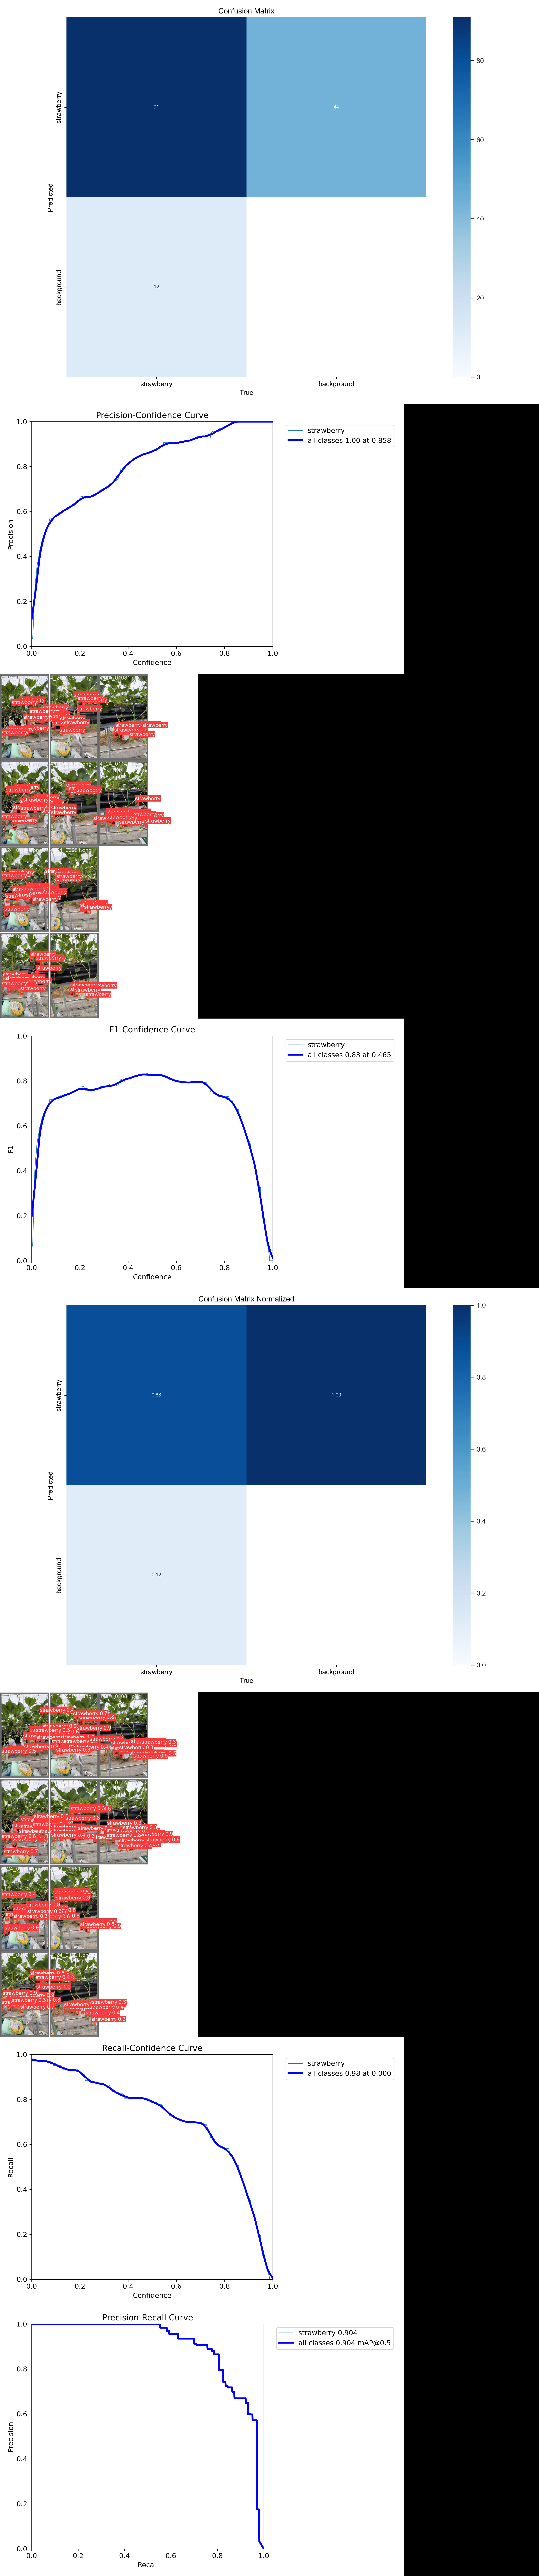

In [33]:
# 検証結果を見てみる
batch_display("/Users/matsumotokotarou/My_Data/Local_Programing/workspace/labo/6_14/runs/detect/val")